# <h1 style="background-color:Pink;"> <font size="15"> <b> <font color='black'> <center> Seminar

## TABLE OF CONTENT
### <b> <a href='#chapter1'> I. Import and Data Processing </a>

    

### <b> <a href='#chapter2'> II. Exploration and Visualization </a> 
    
    
    
### <b> <a href='#chapter4'> III. Modelling - Prediction </a>


# I. Import and Data Processing

In [1732]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
#import plotly.offline as py
#import plotly.graph_objects as go

import os
import re

from sklearn import datasets
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

from PIL import Image
import requests
import urllib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.float_format', '{:.2f}'.format)

In [1733]:
#Mobile Strategy Games Dataframe
games = pd.read_csv('/Users/dinhngocmai/Documents/Seminar WS2122/appstore_games.csv')
games
#Create a copy and check the first 2 lines of data
df = games.copy()
df.head(2)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


[Columns information:](udf_0)
- URL: The URL
- ID: The assigned ID
- Name: The name of game
- Subtitle: The secondary text under the name
- Icon: URL 512px x 512px jpg
- Average User Rating: Rounded to nearest .5, requires at least 5 ratings
- User Rating Count: Number of ratings internationally, null means it is below 5
- Price: Price in USD
- In-app Purchases: Prices of available in-app purchases
- Description: App description
- Developer: App developer
- Age Rating: Either 4+, 9+, 12+ or 17+
- Languages: ISO2A language codes
- Size: Size of the app in bytes
- Primary Genre: Main genre
- Genres: Genres of the app
- Original Release Date: When it was released
- Current Version Release Date: When it was last updated

In [1734]:
#Check dataset info by feature
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("----------------------------------------------------")
print(df.info())

Number of rows: 17007
Number of columns: 18
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating            

[The set has:](udf_0)

In [1735]:
# Categorical Data
cat = [e for e in df.columns if df[e].dtypes == 'object']
len(cat)

13

In [1736]:
# Numerical data
num = [a for a in df.columns if df[a].dtypes != 'object']
len(num)

5

In [1737]:
#Check duplicate rows based on ID
duplicate = df[df.duplicated('ID')]
print("Duplicate Rows based on ID :")
duplicate.head(1)

Duplicate Rows based on ID :


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
16,https://apps.apple.com/us/app/awele-oware-manc...,289217958,Awele/Oware - Mancala HD,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.00,112.00,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.00,Games,"Games, Strategy, Board",31/08/2008,6/04/2015


In [1738]:
#Drop duplicates in ID columns
df = df.drop_duplicates(subset= ['ID'], keep='first')
#df.head(1)

In [1739]:
print("Number of rows:", df.shape[0])
# The set has 160 Duplications.

Number of rows: 16847


In [1740]:
#Check for null values
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11635
Icon URL                            0
Average User Rating              9359
User Rating Count                9359
Price                              24
In-app Purchases                 9232
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

- Missing values in 6 Columns: Subtitle, Average User Rating, User Rating Count, Price, In-app Purchases, Languages, Size

In [1741]:
#Rename some specific columns
df.rename(columns = {'Average User Rating':'User_Rating_Avg','User Rating Count': 'User_Rating_Count', 
                     'In-app Purchases':'In_App_Purchases', 'Age Rating': 'Age', 'Primary Genre': 'Primary_Genre', 
                     'Icon URL': 'Icon_Url', 'Original Release Date': 'Original_Release_Date',
                     'Current Version Release Date': 'Current_Release_Date'}, inplace = True) 
df.tail(1)

,URL,ID,Name,Subtitle,Icon_Url,User_Rating_Avg,User_Rating_Count,Price,In_App_Purchases,Description,Developer,Age,Languages,Size,Primary_Genre,Genres,Original_Release_Date,Current_Release_Date
17006,https://apps.apple.com/us/app/the-three-kingdo...,1475076711,The Three Kingdoms :Bomb,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,nan,nan,0.00,NaN,The protagonist uses the method of placing a b...,ming bo tang,4+,"EN, ZH",22952960.00,Games,"Games, Strategy, Puzzle",2/08/2019,2/08/2019


In [1742]:
#Drop games that has no rating
df = df[pd.notnull(df['User_Rating_Avg'])]

In [1743]:
#we still need to tweak a few more things.
#size in MB
df['Size'] = round(df['Size']/1000000, 1)
#df.head(2)

In [1744]:
#Date time 
df['Original_Release_Year'] = df['Original_Release_Date'].str.extract(r'\b(\w+)$')
df['Current_Release_Year'] = df['Current_Release_Date'].str.extract(r'\b(\w+)$')
#df.head(2)

In [1745]:
df['Age'] = df['Age'].str.replace('+','').astype(int)
#df.head(2)

In [1746]:
#Final Data has:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 7488
Number of columns: 20


In [1747]:
df.describe()

,ID,User_Rating_Avg,User_Rating_Count,Price,Age,Size
count,7488.00,7488.00,7488.00,7488.00,7488.00,7488.00
mean,944327343.82,4.06,3306.24,0.57,6.88,151.57
std,333571894.64,0.75,42515.78,2.42,3.78,255.95
min,284921427.00,1.00,5.00,0.00,4.00,0.20
25%,646307145.75,3.50,12.00,0.00,4.00,30.50
50%,980002724.50,4.50,46.00,0.00,4.00,79.30
75%,1211851404.00,4.50,307.25,0.00,9.00,177.22
max,1474461379.00,5.00,3032734.00,139.99,17.00,4005.60


# II. Exploration and Visualization

### 1. Relationship between Average User Rating and User Rating Count

In [1748]:
df['User_Rating_Avg'].unique()

array([4. , 3.5, 3. , 2.5, 2. , 4.5, 1.5, 5. , 1. ])

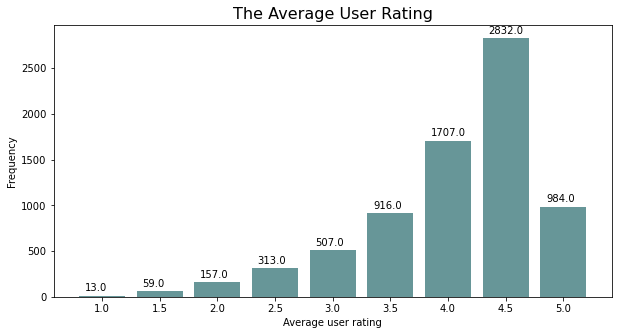

In [1749]:
#Visualization of the Average User Rating
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df,x='User_Rating_Avg', color='cadetblue')
ax.set_xlabel('Average user rating')
ax.set_ylabel('Frequency')
ax.plot()
plt.title('The Average User Rating', fontsize = 16)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

According to the chart, the largest rating count - consisting of half of reviews - in top-rated games has a 4.5 average rating with 4.0 as distant second. Conversely, rating 5.0 does not have the largest count of reviews among top-rated games. Gamers seems are not really strict since the lowest star (1 star) they have given was very small, only 14 times recorded.

### 2. The TOP 5 of games that have the highest user rating count

In [1750]:
most_popular_game = df.sort_values(by='User_Rating_Count', ascending=False)[['Name', 'Price','In_App_Purchases', 'User_Rating_Avg', 'Size', 'User_Rating_Count', 'Icon_Url']].head(5)
most_popular_game.iloc[:, 0:-1]

,Name,Price,In_App_Purchases,User_Rating_Avg,Size,User_Rating_Count
1378,Clash of Clans,0.00,"4.99, 9.99, 19.99, 0.99, 4.99, 0.99, 49.99, 99...",4.50,161.20,3032734.00
7187,Clash Royale,0.00,"4.99, 0.99, 9.99, 19.99, 9.99, 4.99, 0.99, 19....",4.50,145.10,1277095.00
13414,PUBG MOBILE,0.00,"0.99, 9.99, 0.99, 9.99, 24.99, 4.99, 2.99, 99....",4.50,2384.10,711409.00
1921,Plants vs. Zombies\u2122 2,0.00,"4.99, 2.99, 9.99, 9.99, 4.99, 3.99, 3.99, 1.99...",4.50,120.80,469562.00
8139,Pok\xe9mon GO,0.00,"0.99, 4.99, 9.99, 19.99, 39.99, 99.99",3.50,281.50,439776.00


The 5 most popular strategy mobile games based on gamers rating count are:

1. Clash of Clans with over 3 million gamers rating
2. Clash royale with 1.2 million gamers rating
3. PUBG mobile with 7 hundred thousand rating counted
4. Plants vs. Zomebies with nearly 4.7 hundred thousand rating recorded
5. Pokemon GO with nearly 4.4 hundred thousand rating counted

Top 5 are all free of charge with small memory size.

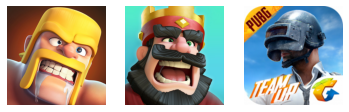

In [1751]:
#Let's see how they look!

plt.figure(figsize=(6,3))
plt.subplot(131)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[0,-1]))
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[1,-1]))
plt.imshow(image)
plt.axis('off')

plt.subplot(133)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[2,-1]))
plt.imshow(image)
plt.axis('off')

plt.show()

(-0.5, 511.5, 511.5, -0.5)

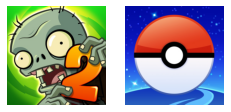

In [1752]:
plt.subplot(131)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[3,-1]))
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[4,-1]))
plt.imshow(image)
plt.axis('off')

### 3. Relationship between Average User Rating, User Rating Count and Price

There are actually four types of game monetization criteria:

    - 100% Free
    - Free, In-App Purchases
    - Paid
    - Paid, In-App Purchases

In [1753]:
df_preis = df.drop(['Age','ID','URL','Developer','Subtitle','Icon_Url','Description','Languages','Primary_Genre','Genres','Original_Release_Date',
                    'Current_Release_Date', 'Original_Release_Year', 'Current_Release_Year'], axis = 1)

In [1754]:
df_preis['Monetization'] = 'Free'
df_preis.loc[(df_preis['Price'] == 0) & (pd.notnull(df_preis['In_App_Purchases'])), 'Monetization'] = 'Free, In-App Purchases'
df_preis.loc[(df_preis['Price'] > 0) & (pd.isnull(df_preis['In_App_Purchases'])), 'Monetization'] = 'Paid'
df_preis.loc[(df_preis['Price'] > 0) & (pd.notnull(df_preis['In_App_Purchases'])), 'Monetization'] = 'Paid, In-App Purchases'

df_preis.head()

,Name,User_Rating_Avg,User_Rating_Count,Price,In_App_Purchases,Size,Monetization
0,Sudoku,4.00,3553.00,2.99,NaN,15.90,Paid
1,Reversi,3.50,284.00,1.99,NaN,12.30,Paid
2,Morocco,3.00,8376.00,0.00,NaN,0.70,Free
3,Sudoku (Free),3.50,190394.00,0.00,NaN,21.60,Free
4,Senet Deluxe,3.50,28.00,2.99,NaN,34.70,Paid


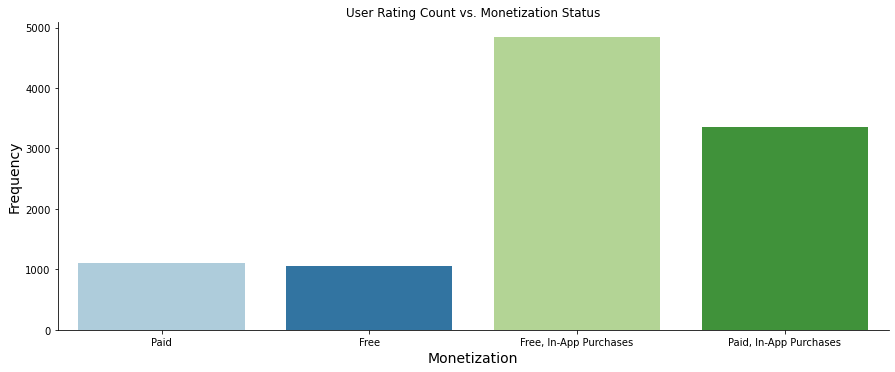

In [1755]:
sns.catplot(data=df_preis, x='Monetization', y='User_Rating_Count', kind= 'bar',
            legend_out=True, ci=None, palette='Paired', aspect=2.5)
plt.xlabel('Monetization', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("User Rating Count vs. Monetization Status")

plt.show()


- From this we can learn that applications that are free but have in-app purchases dominate the Mobile Game market. In this case, we are witnessing a caught-22 situation: That mobile users love using free apps and download free games lead to the chance for the app to be pushed to the top of the searching results, therefore more other users can see them and download them too.

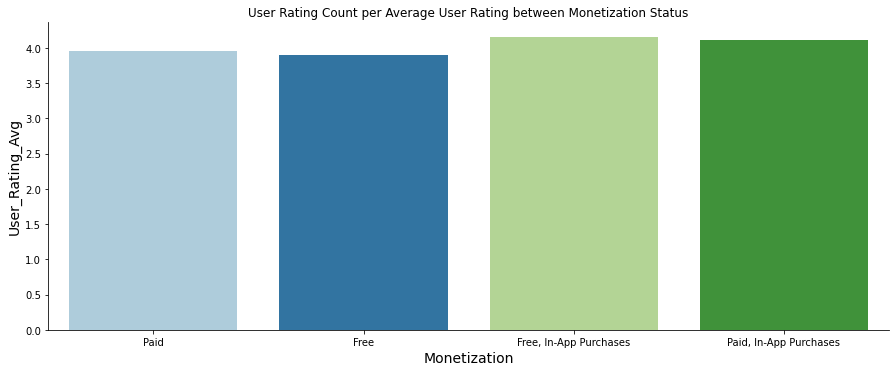

In [1756]:
#Average User Rating Count Paid vs Free Games
sns.catplot(data=df_preis, x='Monetization', y='User_Rating_Avg', kind= 'bar',
            legend_out=True, ci=None, palette='Paired', aspect=2.5)
plt.xlabel('Monetization', fontsize=14)
plt.ylabel('User_Rating_Avg', fontsize=14)
plt.title("User Rating Count per Average User Rating between Monetization Status")

plt.show()


- Whether an app has in-app purchases, costs money to download or is totally free to play, there seems to be no impact on the games rating. However, free to play games has a very slight advantage over the other 2.

In [1757]:
df['In_App_Purchases'] = df['In_App_Purchases'].fillna(0, axis=0)
df['In_App_Purchases'] = df['In_App_Purchases'].apply(lambda x:1 if x!= 0 else 0)
df['In_App_Purchases']=pd.to_numeric(df['In_App_Purchases'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



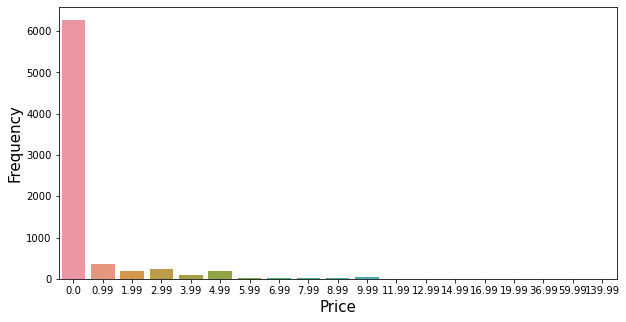

In [1758]:
#Rang of prices
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Price'])
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Price', fontsize = 15)
plt.show()

In this case, once again we have a chance to confirm how big of the number of free mobiles games were used. Specifically, over 14000 mobiles games were recorded being played and the number significantly droped when people have to pay for the app, even $0.99.

### 4. Relationship between Average User Rating and Age Rating

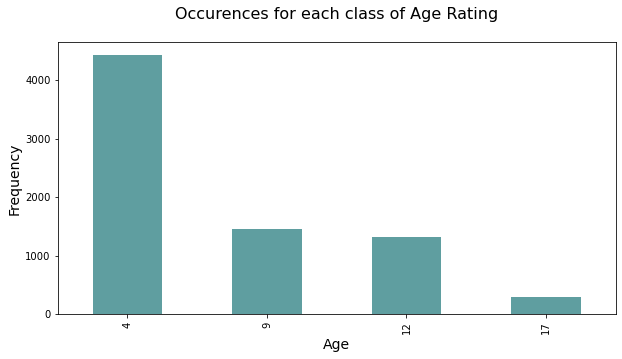

In [1759]:
plt.figure(figsize=(10,5))
df['Age'].value_counts().plot.bar(color = "cadetblue")
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("Occurences for each class of Age Rating\n", fontsize=16)
plt.show()

We clearly see that there is a significant difference of representation between the different classes of the Age Rating : the class "4+" is highly represented, unlike the class "17+". 

There is a negative correlation between the number of observations and the age associated to the class. It is quite intuitive as we can imagine that a higher age limit is less interesting for app creators by the fact that it is more restrictive.

Information:
- 4+: Contains no objectionable material.
- 9+: May contain content unsuitable for children under the age of 9.
- 12+: May contain content unsuitable for children under the age of 12.
- 17+: May contain content unsuitable for children under the age of 17.
- Apps rated 17+ are not allowed to be purchased by children.

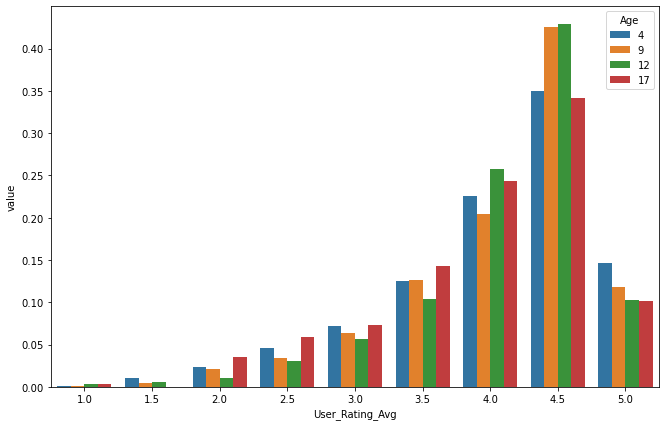

In [1760]:
plt.figure(figsize = (24,7))
plt.subplot(121)
df_age = pd.crosstab(df["Age"],df["User_Rating_Avg"])
df_age = (df_age.T/df_age.T.sum(axis=0)).T
df_age = df_age.reset_index().melt(id_vars=["Age"])
sns.barplot(x =df_age["User_Rating_Avg"], y = df_age["value"], hue = df_age["Age"])

These charts show more details of average user rating related to the age rating. The age rating 9+ and 12+ have quite similar structures. At the same time, the rates of 4+ and 9+ games take many rates with high stars. 

### 5. Relationship between Size and Price

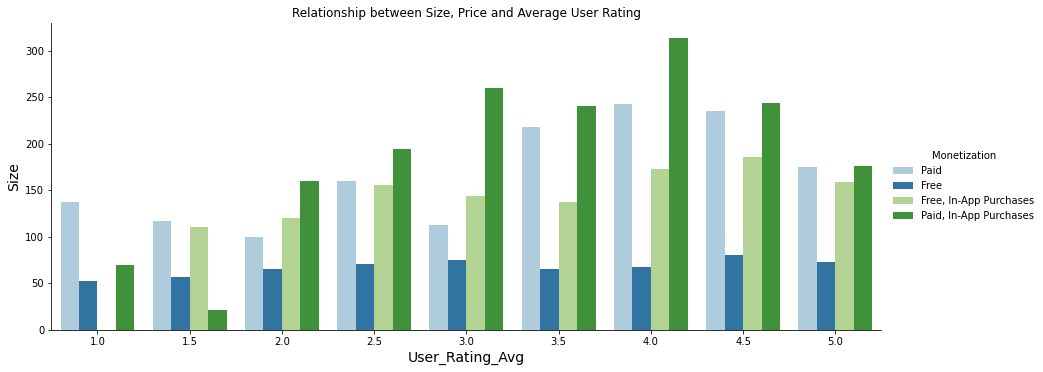

In [1761]:
sns.catplot(data=df_preis, x='User_Rating_Avg', y='Size', kind= 'bar', hue='Monetization',
            legend_out=True, ci=None, aspect=2.5, palette='Paired')
plt.xlabel('User_Rating_Avg', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.title("Relationship between Size, Price and Average User Rating")

plt.show()


Price doesn't have much effect on average user rating. Many paid games are still highly rated.
The smaller price is, the smaller size a game was create and vice versa. It is reasonable because there would be not many game developer created large size of mobile game for free since they have to pay quite a lot for storing the game on the Apple Store.

### 6. Primary Genre

In [1762]:
df['Primary_Genre'].value_counts()

Games                7220
Entertainment          92
Education              46
Utilities              44
Sports                 23
Reference              18
Finance                 8
Productivity            8
Book                    5
Lifestyle               4
Music                   3
Stickers                3
Social Networking       3
News                    2
Business                2
Health & Fitness        2
Travel                  1
Shopping                1
Medical                 1
Navigation              1
Food & Drink            1
Name: Primary_Genre, dtype: int64

- The Games Genre is the primary genre that appeared most frequently with over 7000 strategy mobile games in the dataset. Education and Entertainment are two genres that the number of them can be seen on the charts, but the figures were far from compared to Games.



In [1763]:
primary_avg= df.groupby(['Primary_Genre'])['User_Rating_Avg'].mean().reset_index(name='User_Rating_Avg').sort_values(by= 'User_Rating_Avg', ascending= False)
#primary_avg

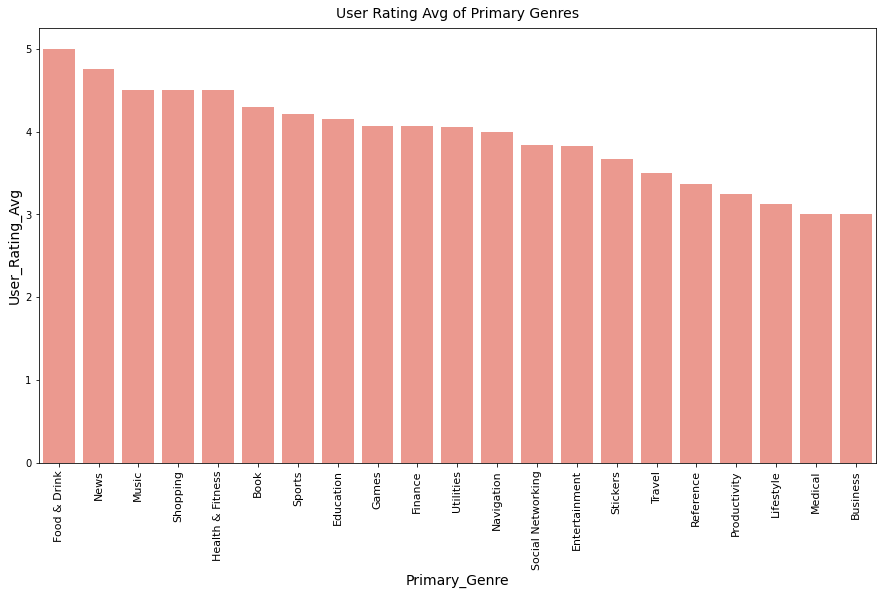

In [1861]:
plt.figure(figsize=(15, 8))
sns.barplot(x=primary_avg['Primary_Genre'], y=primary_avg['User_Rating_Avg'], alpha=0.9 , color = "salmon")
plt.title('User Rating Avg of Primary Genres', fontsize=14, pad=10)
plt.ylabel('User_Rating_Avg', fontsize=14)
plt.xlabel('Primary_Genre', fontsize=14)
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=10)
plt.show()

### 7. Secondary Genre

In [1765]:
df.rename(columns={"Genres": "Secondary_Genre"}, inplace = True)

In [1770]:
#df['Secondary_Genre'].value_counts()

Games, Simulation, Strategy              288
Games, Strategy, Simulation              285
Games, Strategy, Puzzle                  258
Games, Strategy, Action                  255
Games, Puzzle, Strategy                  216
                                        ... 
Games, Strategy, News, Role Playing        1
Games, Lifestyle, Board, Strategy          1
Games, Casual, Strategy, Lifestyle         1
Games, Strategy, Action, Food & Drink      1
Productivity, Racing, Strategy, Games      1
Name: Secondary_Genre, Length: 623, dtype: int64

In [1767]:
genres_list = df['Secondary_Genre'].unique()
ge_dt = set(genres_list)
genres_count = len(ge_dt)
print('Total genres: ', genres_count)

Total genres:  623


In [1768]:
secondary_avg= df.groupby(['Secondary_Genre'])['User_Rating_Avg'].mean().reset_index(name='User_Rating_Avg').sort_values(by= 'User_Rating_Avg', ascending= False)
secondary_avg=secondary_avg.head(20)

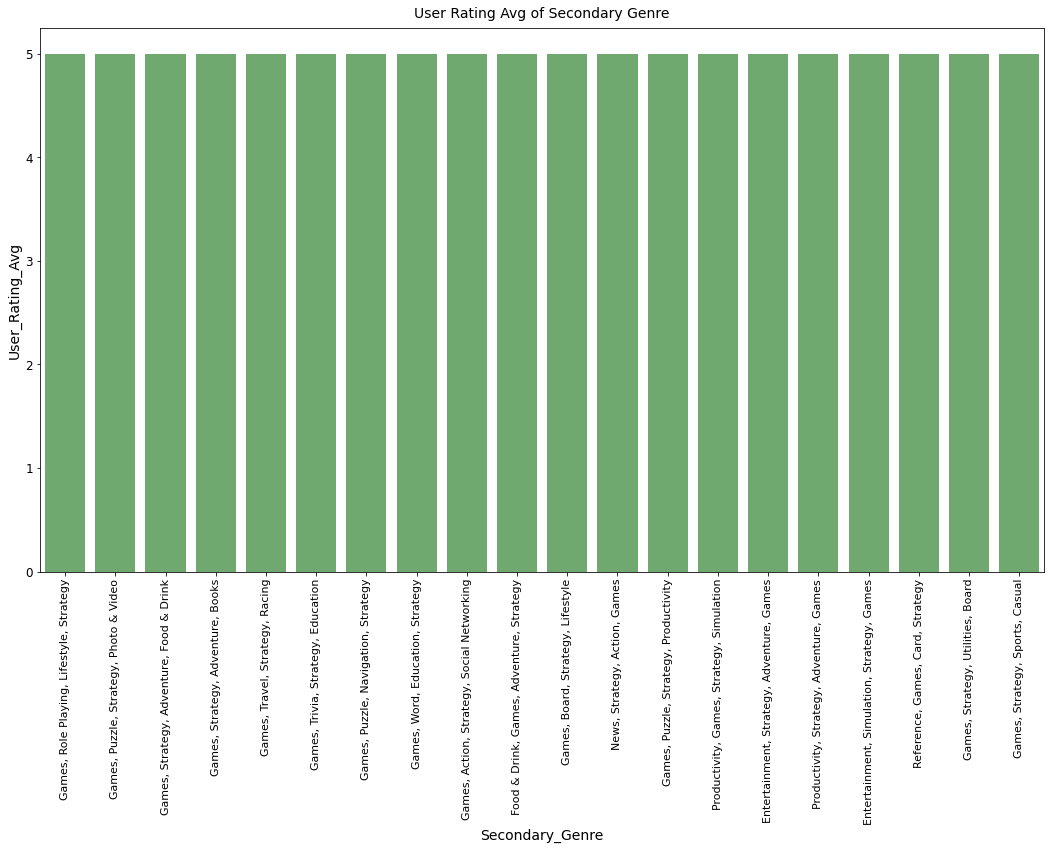

In [1860]:
plt.figure(figsize=(18, 10))
sns.barplot(x=secondary_avg['Secondary_Genre'], y=secondary_avg['User_Rating_Avg'], alpha=0.6 , color = "green")
plt.title('User Rating Avg of Secondary Genre', fontsize=14, pad=10)
plt.ylabel('User_Rating_Avg', fontsize=14)
plt.xlabel('Secondary_Genre', fontsize=14)
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=12)
plt.show()

- The graphs for both Genre categorys show the top rated genres. Food&Drink, News, and Music lead the primary genres, while , Strategy, Puzzle lead secondary genres.

- The genres of game are rated fairly evenly. The reason is th are so many games with the Primary genre as 'Games' or Secondary genre as 'Strategy' compared to the rest of the genres.

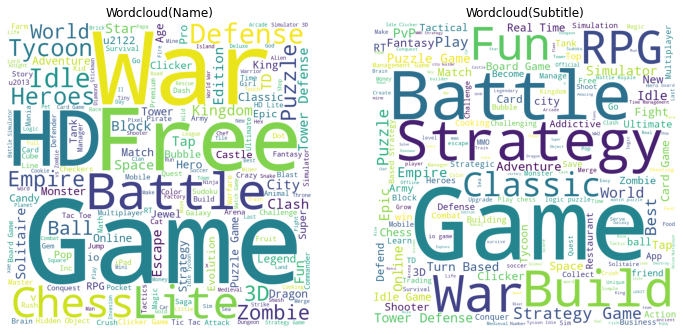

In [1771]:
#Chekc the frequency of Strategy Mobile Games' Genres
fig, ax = plt.subplots(1, 2, figsize=(12,24))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

- As for the Name, the left tag cloud image represent the frequency of genres named Game, Free, War and Battle.
- When it comes to Subtitle, those words that are searched the most are Game, Battle, Puzzle, CLassic. Besides, it is obviously to see Strategy, Build and War 

In [1772]:
#df['Primary_Genre'].unique()
#df['Secondary_Genre'].unique()

In [1773]:
df['Primary_Genre'] = df['Primary_Genre'].apply(lambda x: len(x.split(',')))
df['Secondary_Genre'] = df['Secondary_Genre'].apply(lambda x: len(x.split(',')))
#df.head()

### 8. Languages

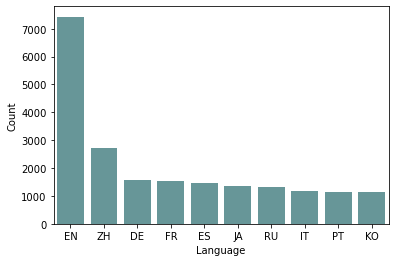

In [1774]:
Languages = pd.DataFrame(df['Languages'].str.split(', ',expand=True))
Languages = pd.DataFrame(Languages.values.ravel(), columns = ["Languages"])
Languages = pd.DataFrame(Languages['Languages'].value_counts().reset_index())
Languages.columns = ['Language', 'Count']
sns.barplot(x="Language", y="Count", color='cadetblue', data=Languages.head(10))

English has the highest occurrence since over 16000 games are supported by this international language while Chinese takes the second position with 5000 games. The range from 2000 to 4000 language supporting of strategy mobile games including many other languages such as Germany, France, Spain, etc.

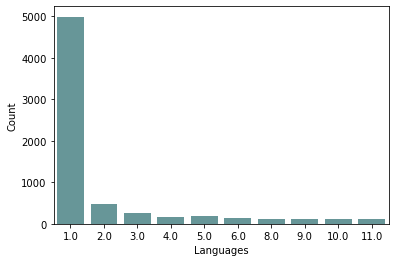

In [1775]:
multi = df['Languages'].str.count(r', ') + 1
multi_lingual = pd.DataFrame(multi.value_counts().reset_index())
multi_lingual.columns = ['Languages', 'Count']
sns.barplot(x="Languages", y="Count",color='cadetblue', data=multi_lingual.head(10));

There are the large number of games with 1 language, while the number of games with 2 or more languages is very small.

In [1776]:
df.Languages=df.Languages.fillna('EN')
df['Languages'] = df['Languages'].apply(lambda x: len(x.split(',')))
#df.head(2)

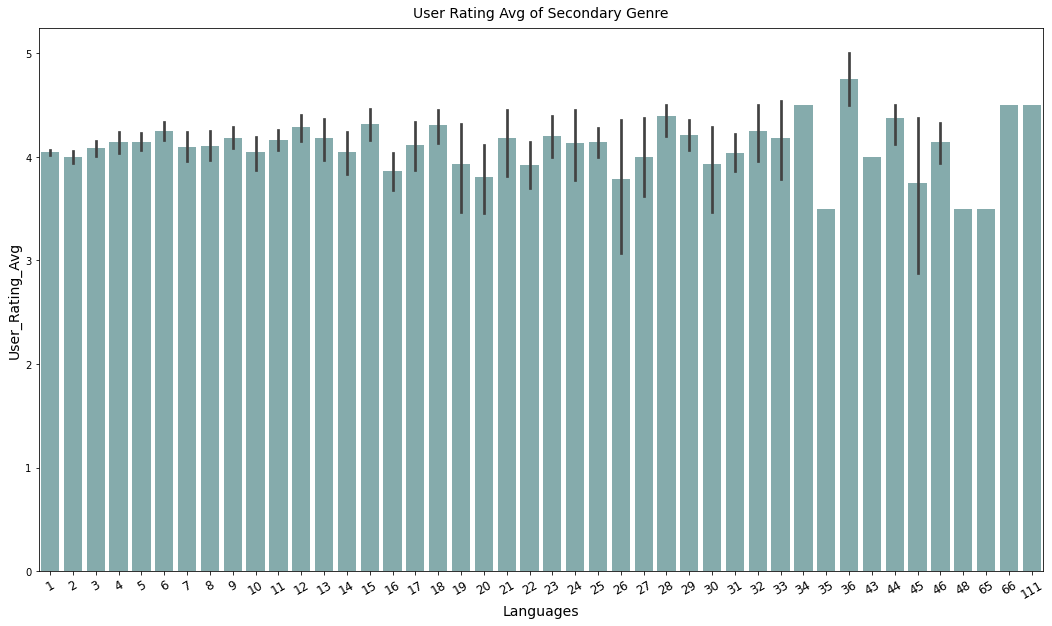

In [1777]:
plt.figure(figsize=(18, 10))
sns.barplot(x=df['Languages'], y=df['User_Rating_Avg'], alpha=0.8 , color = "cadetblue")
plt.title('User Rating Avg of Secondary Genre', fontsize=14, pad=10)
plt.ylabel('User_Rating_Avg', fontsize=14)
plt.xlabel('Languages', fontsize=14)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=10)
plt.show()

- Games with different languages are rated quite similar. The reason is that the number of games with 2 or more languages is too small, that leads to unbiased evaluation.

### 9. Growth of Mobile Strategy Games Market over the years

In [1778]:
df_year = df.groupby(by=df['Original_Release_Year']).count()
df_year = pd.DataFrame(df_year['ID'])
#df_year

Text(0.5, 1.0, 'The growth of mobile games over the years')

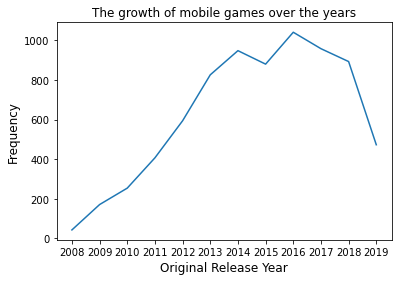

In [1779]:
sns.lineplot(data=df_year, x="Original_Release_Year", y="ID")
plt.xlabel('Original Release Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("The growth of mobile games over the years")


- We can observe that there is indeed a growth in the number of applications produced every year. Keep in mind that the visualization above is taken from a DataFrame which I have filtered. If we use a DataFrame from a dataset, of course the number will be greater, and will not experience a drastic decrease in applications that have just been produced in 2018-2019. But from this visualization we can learn that there is saturation of the Mobile Games market.

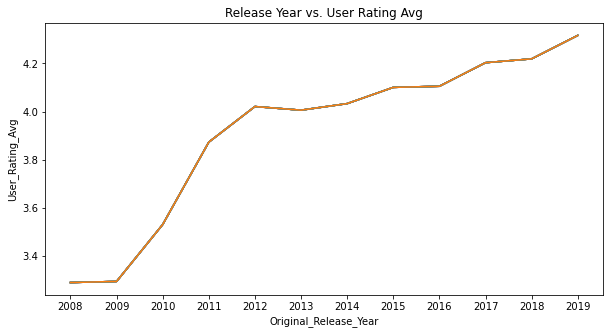

In [1780]:
df_release = df.groupby('Original_Release_Year')['User_Rating_Avg'].mean().reset_index()


fig, ax = plt.subplots(figsize=[10, 5])

for i in df_release["Original_Release_Year"]:
    sns.lineplot(
        x=df_year.index, 
        y=df_release["User_Rating_Avg"]
    )

plt.title('Release Year vs. User Rating Avg')
plt.show()

- The average user rating follows an upward trend over the years.

In [1781]:
df_release_current = df.groupby('Current_Release_Year')['User_Rating_Avg'].mean().reset_index()
df_diff_release = df_release
df_diff_release['User_Rating_Avg'] = df_release['User_Rating_Avg'] - df_release_current['User_Rating_Avg']
df_diff_release.columns = ['Year', 'Difference']
print(df_diff_release)

    Year  Difference
0   2008        0.39
1   2009        0.47
2   2010        0.40
3   2011        0.39
4   2012        0.24
5   2013        0.21
6   2014        0.20
7   2015        0.13
8   2016        0.14
9   2017        0.09
10  2018        0.13
11  2019        0.04


- There is a positive difference when I deduct the average score by the current version release date from the average score by original release date. This supports that a company should constantly update and improve its product to maintain its competitive position.

- If an application is improved and updated on a regular basis, the average customer score will be higher.

### 10. Scatterplot

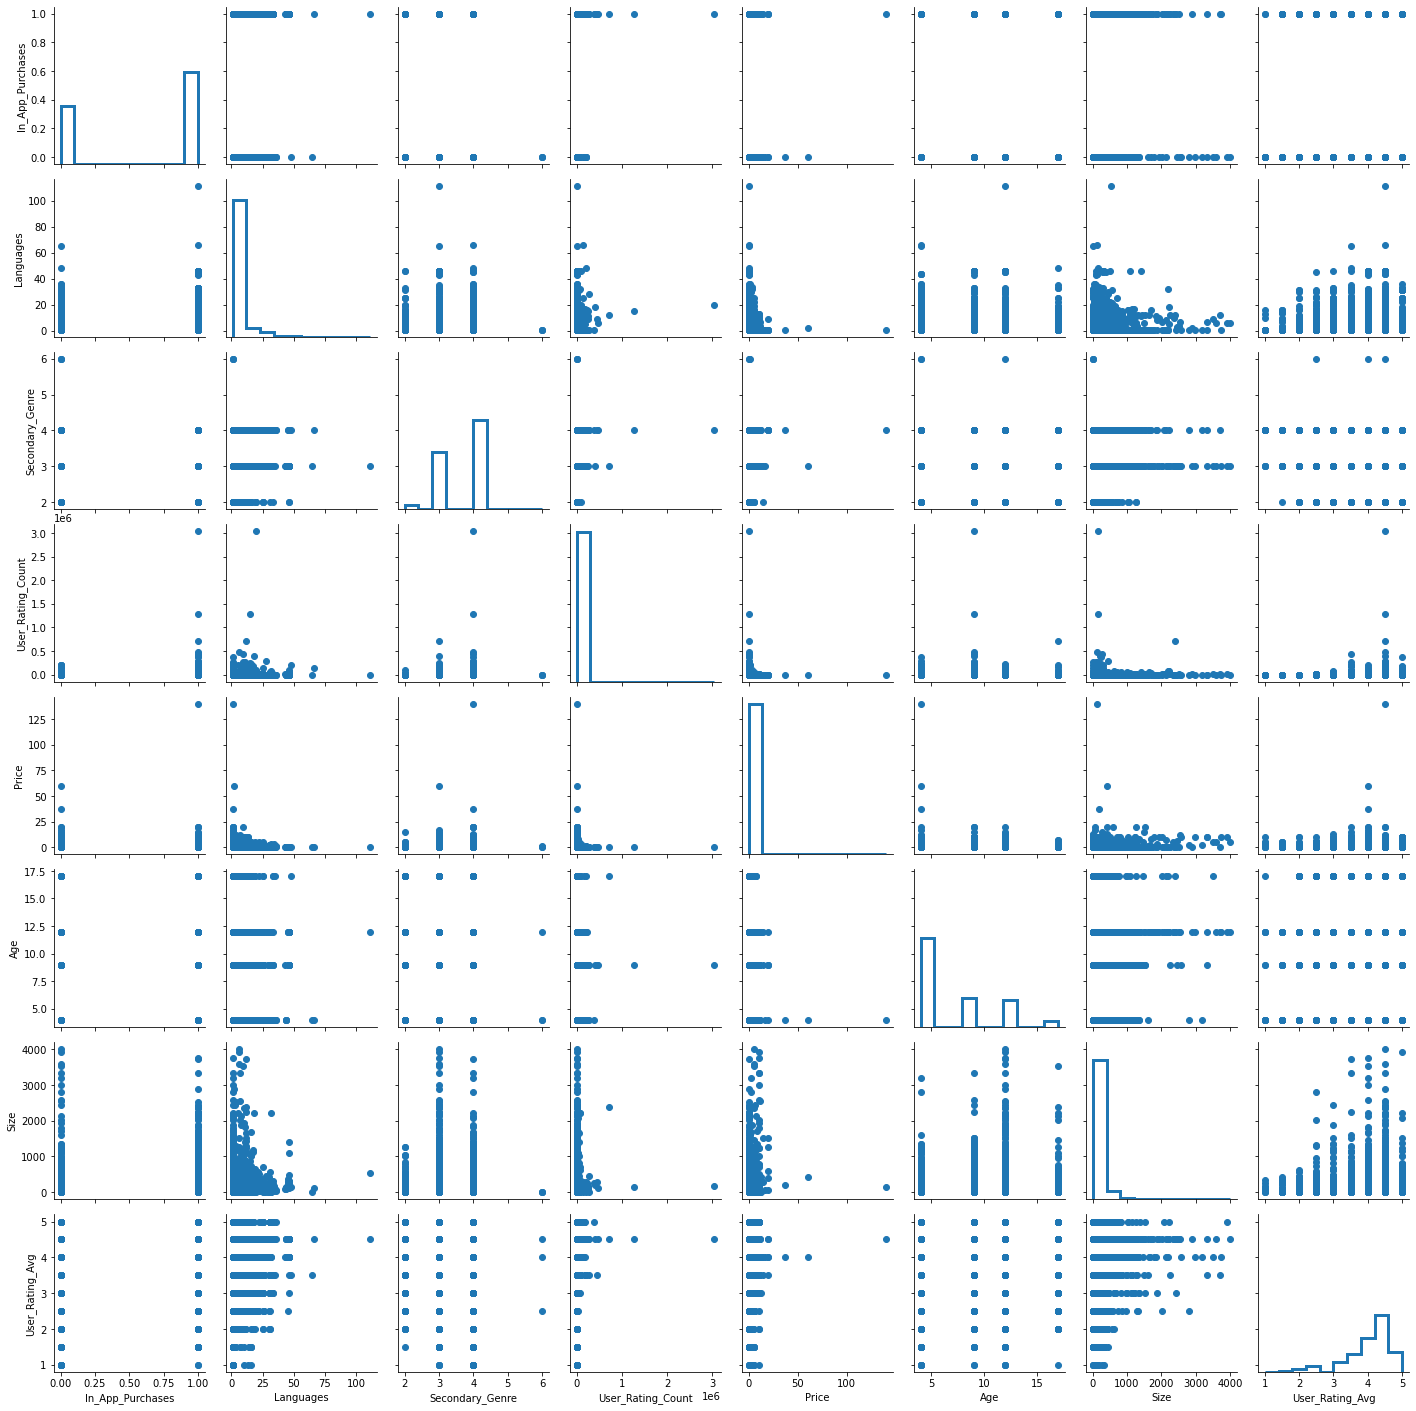

In [1782]:
g = sns.PairGrid(df.loc[:,['In_App_Purchases','Languages', 'Secondary_Genre','User_Rating_Count',
 'Price', 'Age','Size', 'User_Rating_Avg']])
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_offdiag(plt.scatter)

### 11. Correlation matrix

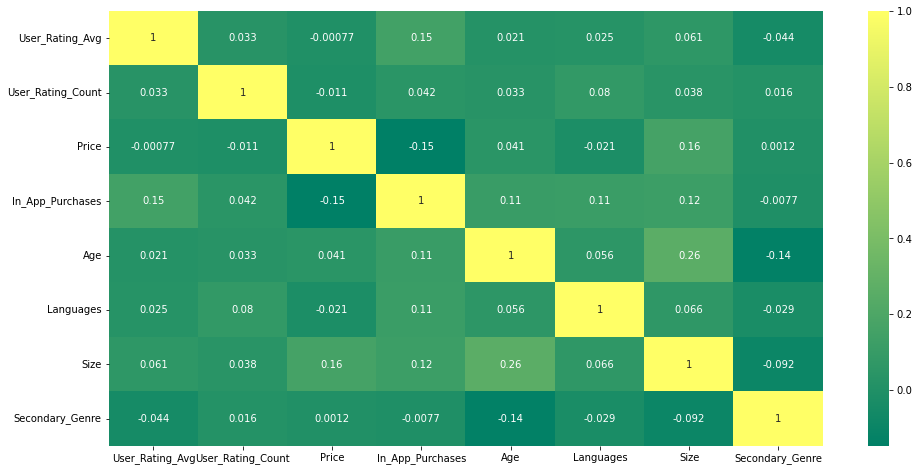

In [1783]:
#Plot correlation matrix
df_corr=df.drop(['ID','URL', 'Name','Developer','Subtitle','Icon_Url','Description',
                 'Original_Release_Date','Current_Release_Date', 'Primary_Genre'],axis = 1)
plt.figure(figsize=(16, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap = 'summer')
plt.show()

- The heatmap provides clearer insight about the correlation between each variables in the model. In this case, Prices have negative correlation with Average User Rating and User Rating Count which tell us that when the price raise, the user rating countand average user rating can be decreased. The same with secondary genre.

- Average User Rating has a ligth possitve correlation with the other features.

# III. Modelling

### 1. Cleaning and Processing Data for Modeling

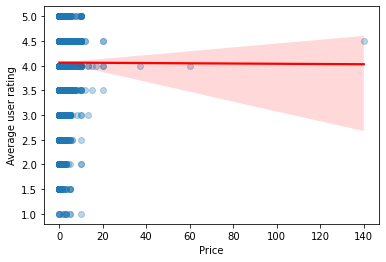

In [1784]:
#Regression plot of Average User Rating and Price
ax= sns.regplot(y='User_Rating_Avg',x='Price',data= df,scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
ax.set_ylabel('Average user rating')
ax.set_xlabel('Price')
plt.title('')
plt.show()

There is a relationship between price and rating.It is clearly to see that most of the ratings are 4 points. The higher price of a game, the higher chance it gets lower rate on average.

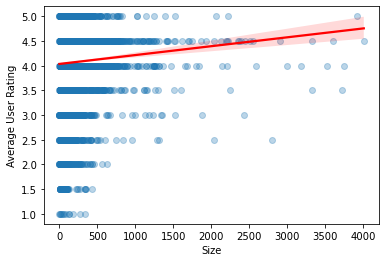

In [1785]:
#Regression plot of Average User Rating and Size
ax = sns.regplot(x='Size',y='User_Rating_Avg',data = df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
ax.set_xlabel('Size')
ax.set_ylabel('Average User Rating')
plt.show()

The relationship between average user rating and size shows that when the size is bigger, the users have tendency to rate higher stars.

In [1786]:
df1 = df.drop(['ID','URL', 'Name','Developer','Subtitle','Icon_Url','Description',
            'Primary_Genre','Original_Release_Date','Current_Release_Date',
            'Current_Release_Year'], axis = 1)

In [1787]:
#df1['User_Rating_Avg']=df1['User_Rating_Avg'].replace([1.5, 2.5, 3.5, 4.5],[2,3, 4, 5])

In [1788]:
#df1['User_Rating_Avg']= df1['User_Rating_Avg'].astype(int)

In [1789]:
#df1['User_Rating_Avg'].unique()

### 2. Classification - Logistic Regression Model

In [1790]:
df1.head()

,User_Rating_Avg,User_Rating_Count,Price,In_App_Purchases,Age,Languages,Size,Secondary_Genre,Original_Release_Year
0,4.00,3553.00,2.99,0,4,17,15.90,3,2008
1,3.50,284.00,1.99,0,4,1,12.30,3,2008
2,3.00,8376.00,0.00,0,4,1,0.70,3,2008
3,3.50,190394.00,0.00,0,4,17,21.60,3,2008
4,3.50,28.00,2.99,0,4,15,34.70,4,2008


- Dependent variable (Y): User_Rating_Avg - 5 classes

- Independent variables (X): User_Rating_Count, Price, Age_Rating, Size, Original_Release_Year

In [1791]:
from sklearn.base import clone

# Modified Ordinal Regressor Model
# Original Source: https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c
class OrdinalClassifier():
    
    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}
    
    def fit(self, X, y):
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0]-1):
                # for each k - 1 ordinal value we fit a binary classification problem
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y)
                self.clfs[i] = clf
    
    def predict_proba(self, X):
        clfs_predict = {k:self.clfs[k].predict_proba(X) for k in self.clfs}
        predicted = []
        for i,class_ in enumerate(self.unique_class):
            if i == 0:
                # V1 = 1 - Pr(y > V1)
                predicted.append(1 - clfs_predict[i][:,1])
            elif i in clfs_predict:
                # Vi = Pr(y > Vi-1) - Pr(y > Vi)
                 predicted.append(clfs_predict[i-1][:,1] - clfs_predict[i][:,1])
            else:
                # Vk = Pr(y > Vk-1)
                predicted.append(clfs_predict[i-1][:,1])
        return np.vstack(predicted).T
    
    def predict(self, X):
        result = np.argmax(self.predict_proba(X), axis=1)
        translate_dict = dict(enumerate(model.unique_class))
        return [translate_dict[i] for i in result]
    
    def accuracy(self,x_test,y_test):
        return len([i for i, j in zip(self.predict(x_test), list(y_test)) if i == j])/len(y_test)

We are now ready for the modelisation phase. First we need to split our data into two subsets :

- the train set to fit the models.

- the test set to evaluate the models.

In [1792]:
# features
X = df1.iloc[:, 0:-1].to_numpy() 
# target
y = df1.iloc[:, 0].to_numpy()   

In [1855]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.9,random_state=0, stratify=y)

In [1856]:
sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [1857]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model = OrdinalClassifier(clf)

In [1858]:
#Train the model
model.fit(scaled_x_train, y_train)

In [1859]:
from sklearn.metrics import confusion_matrix, accuracy_score
model.accuracy(scaled_x_train, y_train)

0.9959893048128342

Accuracy score: Overall model score on training sets.

y_test = 0, y_predict = 0 => True Negative (TN)

y_test = 1, y_predict = 0 => False Negative (FN)

y_test = 0, y_predict = 1 => False Positive (FP)

y_test = 1, y_predict = 1 => True Positive (TP)

accuracy_score = (TN + TP)/(TN + FN + FP + TP)

In [1798]:
#combine predictions and target_test
#model.predict(scaled_x_test)
y_pred = model.predict(scaled_x_test)
df_check = pd.DataFrame([y_test,y_pred]).T
df_check.columns = ['y_test','y_pred']
df_check.head()

,y_test,y_pred
0,3.50,3.50
1,3.50,3.50
2,4.00,4.00
3,4.50,4.50
4,4.50,4.50


In [1799]:
#df_check['y_test'].unique()

In [1800]:
#df_check['y_pred'].unique()

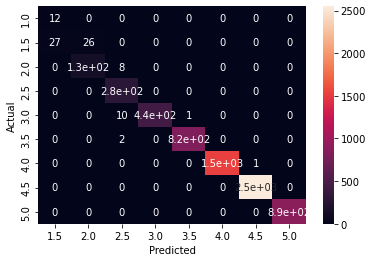

In [1801]:
#Cofustion Matrix
confusion_matrix = pd.crosstab(df_check['y_test'], df_check['y_pred'], rownames=['Actual'], colnames=['Predicted'])
#print (confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [1802]:
normalized_confusion_matrix = confusion_matrix/confusion_matrix.sum(axis = 1, keepdims = False)
#print(normalized_confusion_matrix)

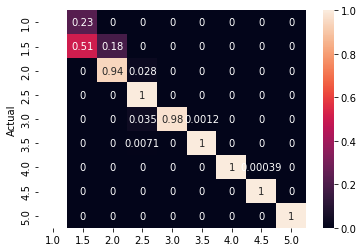

In [1803]:
sns.heatmap(normalized_confusion_matrix, annot=True)
plt.show()

In [1804]:
### 3. Classification - Logistic Regression Model